Original Car Data Loaded!

Dataset shape: (2360, 8)
     region  category  parameter  mode  powertrain      year      unit  \
0 -1.682247       0.0  -1.012992   0.0   -1.270008 -1.552769 -0.254206   
1 -1.682247       0.0   1.007992   0.0   -0.302754 -1.552769  1.008270   
2 -1.682247       0.0  -0.339330   0.0   -0.302754 -1.552769  1.008270   
3 -1.682247       0.0   0.334331   0.0   -1.270008 -1.552769 -0.254206   
4 -1.682247       0.0   0.334331   0.0   -1.270008 -1.289500 -0.254206   

      value  
0 -0.444350  
1 -0.459663  
2 -0.459662  
3 -0.444350  
4 -0.390910   

Numeric columns: ['region', 'category', 'parameter', 'mode', 'powertrain', 'year', 'unit', 'value']
Categorical columns: [] 

✅ Missing values handled.

✅ Categorical columns encoded.

✅ Numeric columns scaled.

Outliers removed! Clean data rows: 1978
Outlier rows removed: 382



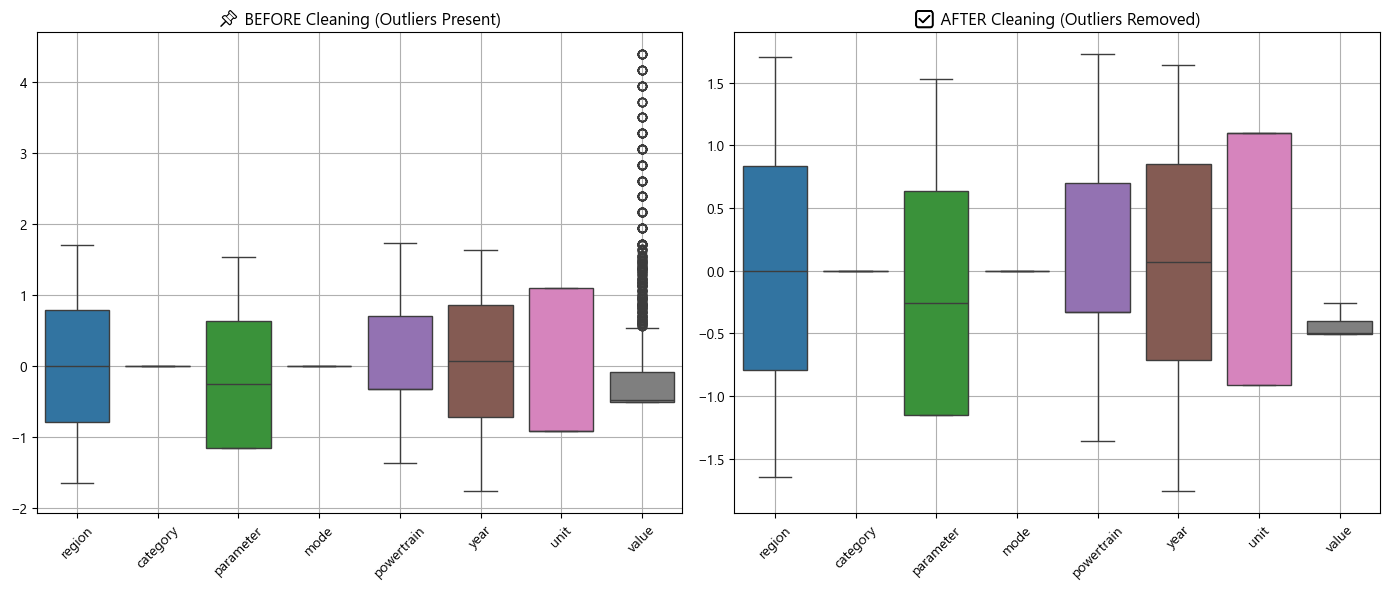

 Cleaned car dataset saved successfully to: C:\Users\sudee\Downloads\IEA-EV-dataEV salesHistoricalCars.csv
 Preprocessing & Visualization Completed! 


In [1]:
# ======================================
#  Car Dataset Preprocessing Script
# ======================================

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Font for emoji titles
matplotlib.rcParams['font.family'] = 'Segoe UI Emoji'

# ======================================
#  Load Dataset
# ======================================
file_path = r"C:\Users\sudee\Downloads\ev_data_sales.xlsx"
df = pd.read_csv(file_path)

print("Original Car Data Loaded!\n")
print(f"Dataset shape: {df.shape}")
print(df.head(), "\n")

# ======================================
#  Identify Column Types
# ======================================
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object', 'category']).columns

print("Numeric columns:", list(num_cols))
print("Categorical columns:", list(cat_cols), "\n")

# ======================================
#  Handle Missing Values
# ======================================
# Fill numeric columns with mean
df[num_cols] = df[num_cols].fillna(df[num_cols].mean())

# Fill categorical columns with mode
for col in cat_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].mode()[0], inplace=True)

print("✅ Missing values handled.\n")

# ======================================
#  Encode Categorical Columns
# ======================================
label_encoder = LabelEncoder()
for col in cat_cols:
    df[col] = label_encoder.fit_transform(df[col].astype(str))

print("✅ Categorical columns encoded.\n")

# ======================================
# ⚖ Feature Scaling (Only for Numeric)
# ======================================
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

print("✅ Numeric columns scaled.\n")

# ======================================
#  Outlier Removal (IQR Method)
# ======================================
def remove_outliers_iqr(data, cols):
    cleaned_data = data.copy()
    for col in cols:
        Q1 = cleaned_data[col].quantile(0.25)
        Q3 = cleaned_data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_limit = Q1 - 1.5 * IQR
        upper_limit = Q3 + 1.5 * IQR
        cleaned_data = cleaned_data[
            (cleaned_data[col] >= lower_limit) & (cleaned_data[col] <= upper_limit)
        ]
    return cleaned_data

df_clean = remove_outliers_iqr(df, num_cols)

print(f"Outliers removed! Clean data rows: {len(df_clean)}")
print(f"Outlier rows removed: {len(df) - len(df_clean)}\n")

# ======================================
# Boxplot Visualization (Before & After)
# ======================================
plt.figure(figsize=(14, 6))

# Before cleaning
plt.subplot(1, 2, 1)
sns.boxplot(data=df[num_cols])
plt.title("📌 BEFORE Cleaning (Outliers Present)")
plt.xticks(rotation=45)
plt.grid(True)

# After cleaning
plt.subplot(1, 2, 2)
sns.boxplot(data=df_clean[num_cols], showfliers=False)
plt.title("✅ AFTER Cleaning (Outliers Removed)")
plt.xticks(rotation=45)
plt.grid(True)

plt.tight_layout()
plt.show()

# ======================================
# Save Cleaned Data
# ======================================
output_path = r"C:\Users\sudee\Downloads\ev_data_sales.xlsx"
df_clean.to_csv(output_path, index=False)

print(f" Cleaned car dataset saved successfully to: {output_path}")
print(" Preprocessing & Visualization Completed! ")
